In [2]:
import qiskit_nature
from rdkit import Chem
from pathlib import Path 
import rdkit

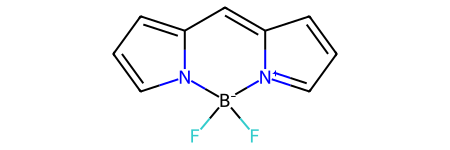

In [3]:
#smile='C1=CSC=N1'
smile = '[B-]1(n2cccc2C=C3[N+]1=CC=C3)(F)F'
smi_key='BODIPY'
mol_rdkit = Chem.MolFromSmiles(smile)
mol_rdkit

In [4]:
 import py3Dmol 

In [5]:
 # Verify if the "data2402_{smi_key}" subdirectory exist and if not, create it
working_dir = Path(f'./data2405/{smi_key}')
# Create the output directory if it doesn't exist
working_dir.mkdir(parents=True, exist_ok=True)


In [6]:

def view3D(mol, label, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)       # visualiser la molécule avec une largeur de ''400'' et hauteur de ''400''

        if fmt=='mol':                                   # si le format des 'mol',
            view.addModel(Chem.MolToMolBlock(mol), fmt)     # generer les coordonnes de a molecule dans un block
            # view.addModel(mol, fmt)
        elif fmt=='xyz':                                      # sinon 
            view.addModel(mol, fmt)                             # generer les coordonnes en xyz

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})     # définir le style de représentation de la molécule, avec des bâtons pour les liaisons et des sphères pour les atomes avec une échelle de '30'
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}}) # ajouter une etiquette de visualisation dont les coordonnées sont x,y,z

        view.zoomTo()
        view.show()

Meilleur conformere

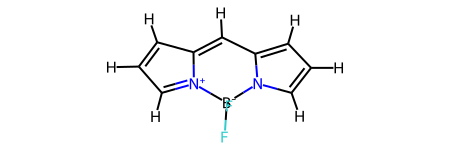

In [7]:
from rdkit.Chem import AllChem

# Add explicit Hs
mol_rdkit = Chem.AddHs(mol_rdkit)    #   Ajouter les atomes d'hydrogene a la molécule

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkit)
mol_rdkit

Visualisation 3D

In [8]:
# 3D visualization
mol_rdkit0 = mol_rdkit                    #crée une nouvelle variable mol_rdkit0 qui est une copie de mol_rdkit.
                                           #Cette copie est nécessaire pour la visualisation 3D, car la fonction view3D() modifie l'objet molécule passé en argument.

view3D(mol_rdkit0, f'{smi_key} RDKit Molecule')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
# Convert RDKit molecule to XYZ format 
mol_xyz0 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
print(mol_xyz0)

21

B      0.077540   -1.260063    0.662168
N      1.287298   -0.512080    0.167762
C      2.610063   -0.872251    0.256071
C      3.376476    0.106602   -0.326730
C      2.477341    1.052924   -0.761252
C      1.191909    0.660042   -0.450475
C     -0.110072    1.302633   -0.691166
C     -1.226323    0.718760   -0.291707
N     -1.210933   -0.517100    0.366848
C     -2.465701   -0.871538    0.654737
C     -3.367151    0.157580    0.176219
C     -2.649449    1.109206   -0.388242
F      0.167736   -1.384240    2.127318
F     -0.008884   -2.602113    0.071666
H      2.928855   -1.787844    0.719808
H      4.459867    0.107265   -0.412239
H      2.746806    1.974054   -1.274174
H     -0.159997    2.257776   -1.197146
H     -2.712431   -1.798886    1.169208
H     -4.447832    0.134476    0.273536
H     -2.965119    2.024799   -0.852211



Préoptimisation avec RDKIT \
visualisation 3D

In [10]:
from rdkit.Chem import AllChem

# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")   # utiliser 200 itérations et la variante MMFF94s

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

# 3D visualization
mol_rdkit1 = mol_rdkit
view3D(mol_rdkit1, f'{smi_key} RDKit Molecule MMFF94')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
# Convert RDKit molecule to XYZ format 
mol_xyz1 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
# Remove the first two lines (number of atoms and empty line) from XYZ data
mol_xyz1 = '\n'.join(mol_xyz0.strip().split('\n')[2:]) 
# Check that the xyz file is valide for the next step (pyscf.gto)
print(mol_xyz1)

B      0.077540   -1.260063    0.662168
N      1.287298   -0.512080    0.167762
C      2.610063   -0.872251    0.256071
C      3.376476    0.106602   -0.326730
C      2.477341    1.052924   -0.761252
C      1.191909    0.660042   -0.450475
C     -0.110072    1.302633   -0.691166
C     -1.226323    0.718760   -0.291707
N     -1.210933   -0.517100    0.366848
C     -2.465701   -0.871538    0.654737
C     -3.367151    0.157580    0.176219
C     -2.649449    1.109206   -0.388242
F      0.167736   -1.384240    2.127318
F     -0.008884   -2.602113    0.071666
H      2.928855   -1.787844    0.719808
H      4.459867    0.107265   -0.412239
H      2.746806    1.974054   -1.274174
H     -0.159997    2.257776   -1.197146
H     -2.712431   -1.798886    1.169208
H     -4.447832    0.134476    0.273536
H     -2.965119    2.024799   -0.852211


In [12]:
from tangelo import SecondQuantizedMolecule as SQMol
from tangelo.helpers.utils import is_package_installed

Creation de l'objet mole

In [13]:
thiazole_321g = SQMol(mol_xyz1, q=0, spin=0, basis="3-21g")
print(f"active molecular orbitals : {thiazole_321g.n_active_mos} ")
print(f"active electrons : {thiazole_321g.n_active_electrons} ")

active molecular orbitals : 126 
active electrons : 70 


In [14]:
import dftd4.pyscf as disp
from pyscf import solvent


mf = thiazole_321g.mean_field

# Utiliser la méthode "ddCOSMO" de l'objet "solvent"
mf = mf.run().ddCOSMO()
mf.with_solvent.eps = 2.3741   # Toluene
mf = disp.energy(mf).run()

In [15]:
mf.analyze(verbose=5)

**** SCF Summaries ****
Total Energy =                        -673.884670833972223
Nuclear Repulsion Energy =             861.257970215010346
One-electron Energy =                -2633.944176421502107
Two-electron Energy =                 1098.815066280204746
Empirical Dispersion Energy =           -0.097806137899433
**** MO energy ****
MO #1   energy= -26.0826514285168  occ= 2
MO #2   energy= -26.0741620151982  occ= 2
MO #3   energy= -15.5689276635378  occ= 2
MO #4   energy= -15.5237466246545  occ= 2
MO #5   energy= -11.2935527024839  occ= 2
MO #6   energy= -11.2588409883151  occ= 2
MO #7   energy= -11.2489619258448  occ= 2
MO #8   energy= -11.2341057218757  occ= 2
MO #9   energy= -11.2228821472415  occ= 2
MO #10  energy= -11.2191169347116  occ= 2
MO #11  energy= -11.21051121612    occ= 2
MO #12  energy= -11.1802312277718  occ= 2
MO #13  energy= -11.1654493868854  occ= 2
MO #14  energy= -7.65458536057234  occ= 2
MO #15  energy= -1.50609407538495  occ= 2
MO #16  energy= -1.475026869290

MO #102 energy= 1.27664093347774   occ= 0
MO #103 energy= 1.29317548523043   occ= 0
MO #104 energy= 1.30129230470839   occ= 0
MO #105 energy= 1.31127531417169   occ= 0
MO #106 energy= 1.32884256840818   occ= 0
MO #107 energy= 1.35922601828557   occ= 0
MO #108 energy= 1.44523054974205   occ= 0
MO #109 energy= 1.46405421337307   occ= 0
MO #110 energy= 1.48651792368624   occ= 0
MO #111 energy= 1.49982224919632   occ= 0
MO #112 energy= 1.51900624220632   occ= 0
MO #113 energy= 1.53095911443386   occ= 0
MO #114 energy= 1.56862462384805   occ= 0
MO #115 energy= 1.60531926339028   occ= 0
MO #116 energy= 1.64342030088094   occ= 0
MO #117 energy= 1.65668978421094   occ= 0
MO #118 energy= 1.72069384015887   occ= 0
MO #119 energy= 1.79789087175336   occ= 0
MO #120 energy= 1.81614998819948   occ= 0
MO #121 energy= 1.85055578732473   occ= 0
MO #122 energy= 1.86820648113289   occ= 0
MO #123 energy= 1.93755680513206   occ= 0
MO #124 energy= 2.02288512506731   occ= 0
MO #125 energy= 2.09431593305113  

((array([1.99932184e+00, 6.62667494e-01, 9.95861623e-03, 6.37045964e-01,
         5.35537343e-01, 5.17534502e-01, 2.85388461e-02, 2.74954558e-02,
         2.46231450e-02, 1.99964800e+00, 1.19613248e+00, 1.20322102e-03,
         1.27572603e+00, 1.28475092e+00, 1.42874100e+00, 2.66820250e-03,
         2.37253157e-03, 5.56799354e-03, 1.99975698e+00, 9.70261625e-01,
         2.61972830e-03, 8.79742608e-01, 1.08693926e+00, 1.02370526e+00,
         1.09805093e-02, 4.44475033e-03, 4.67257278e-03, 1.99972852e+00,
         9.52528950e-01, 1.79530595e-03, 1.10072683e+00, 1.03129005e+00,
         1.07966110e+00, 2.67332120e-03, 8.76649543e-03, 5.92332617e-03,
         1.99972985e+00, 9.60604716e-01, 1.99853187e-03, 1.02113772e+00,
         1.08157059e+00, 1.04066492e+00, 9.35829809e-03, 3.73863756e-03,
         4.36515591e-03, 1.99975192e+00, 9.05879182e-01, 3.28183837e-03,
         1.03090635e+00, 9.41291285e-01, 1.07983983e+00, 4.49785940e-03,
         9.20278485e-03, 6.18941987e-03, 1.99971966

In [19]:
n_lumo = thiazole_321g.mo_occ.tolist().index(0.)
n_homo = n_lumo - 1
print(f"indice homo : {n_homo} ")
print(f" indice lumo: {n_lumo} ")

n_molecular_orb = thiazole_321g.n_mos
frozen = [n for n in range(n_molecular_orb) if n not in range(n_homo, n_lumo+1)] # definition des orbitales gelées

#print(f"{o2_6311gdp_frozen.n_active_mos} active molecular orbitals")
#print(f"{o2_6311gdp_frozen.n_active_electrons} active electrons")
print(f'le nombre orbitales moleculaire est :{n_molecular_orb}')
len(frozen)

indice homo : 48 
 indice lumo: 49 
le nombre orbitales moleculaire est :140


138

Hamiltonien

In [20]:
from tangelo.toolboxes.molecular_computation.frozen_orbitals import get_orbitals_excluding_homo_lumo

# Selecting HOMO-3 to LUMO+3 orbitals.
#frozen = get_orbitals_excluding_homo_lumo(thiazole_321g, homo_minus_n=3, lumo_plus_n=3)

thiazole_321g_frozen = SQMol(mol_xyz1, q=0, spin=0,
                                            basis="3-21g",
                                            frozen_orbitals=frozen)
print(f"{thiazole_321g_frozen.n_active_mos} active molecular orbitals")
print(f"{thiazole_321g_frozen.n_active_electrons} active electrons")

2 active molecular orbitals
2 active electrons


In [21]:
from tangelo.toolboxes.qubit_mappings.mapping_transform import fermion_to_qubit_mapping
from tangelo.toolboxes.operators import count_qubits
from tangelo.toolboxes.operators.taper_qubits import QubitTapering

hamiltonian = fermion_to_qubit_mapping(thiazole_321g_frozen.fermionic_hamiltonian, "JW")
n_qubits = count_qubits(hamiltonian)
taper = QubitTapering(hamiltonian, n_qubits,
                      n_electrons=thiazole_321g_frozen.n_active_electrons)
hamiltonian_taper = taper.z2_tapered_op
n_qubits_tapered = count_qubits(hamiltonian_taper)

print(f"Number of qubits: {n_qubits}")
print(f"Number of qubits after tapering: {n_qubits_tapered}")
print(f"{n_qubits - n_qubits_tapered} Z2 symmetries detected")

: 

: 

Calcul vqe

In [18]:
from tangelo.algorithms.variational import VQESolver, BuiltInAnsatze
from tangelo.algorithms.classical import FCISolver

# Dictionary of resources for each algorithm
algorithm_resources = dict()

# Ground state energy calculation with VQE, reference values with FCI
vqe_options = {"molecule": thiazole_321g_frozen, "ansatz": BuiltInAnsatze.UCCSD}
vqe_solver = VQESolver(vqe_options)
vqe_solver.build()
vqe_energy = vqe_solver.simulate()
print("\n Ground Singlet state")
print(f"VQE energy = {vqe_energy}")
print(f"CASCI energy = {FCISolver(thiazole_321g_frozen).simulate()}")
algorithm_resources["vqe_ground_state"] = vqe_solver.get_resources()

# First excited state energy calculation with VQE, reference values with FCI
vqe_options = {"molecule": mol_Li2_t, "ansatz": BuiltInAnsatze.UpCCGSD}
vqe_solver_t = VQESolver(vqe_options)
vqe_solver_t.build()
vqe_energy_t = vqe_solver_t.simulate()
print("\n Lowest Triplet state")
print(f"VQE energy = {vqe_energy_t}")
print(f"CASCI energy = {FCISolver(mol_Li2_t).simulate()}")
algorithm_resources["vqe_triplet_state"] = vqe_solver_t.get_resources()

KeyboardInterrupt: 